In [76]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab

np.set_printoptions(suppress=True)

from scipy.optimize import curve_fit
from matplotlib.ticker import MaxNLocator

In [2]:
df_plurality = pd.read_csv('parallel_merge_plurality.csv', names=['k','node','number_influenced','s'])
df_max = pd.read_csv('parallel_merge_max.csv', names=['k','node','number_influenced','s'])
df_min = pd.read_csv('parallel_merge_min.csv', names=['k','node','number_influenced','s'])
df_random = pd.read_csv('parallel_merge_random.csv', names=['k','node','number_influenced','s'])

In [3]:
def transform_data_plot(df):
    df_t = df.copy()

    # Get only rows with the max k-value
    idx = df_t.groupby(['node','s'])['k'].transform(max) == df_t['k']
    df_t = df_t[idx][['node','number_influenced','s']]
    df_t = df_t.reset_index(drop=True)
    
    # Group by s and calculate the mean
    df_t = df_t[['s','number_influenced']].groupby(by='s', as_index=False).mean()
        
    return df_t

## Simple majority

In [4]:
df_plot = transform_data_plot(df_plurality).round(3)
df_plot.head()

,s,number_influenced
0,0,1.161
1,1,12.075
2,2,468.778
3,3,2488.339
4,4,8114.379


In [5]:
def bass_wo(x, M, P, Q):
    """
    p: coefficinet of innvotion
    q: coefficient of imitation
    m: potential pool of adapoters
    
    The average value of p has been found to be 0.03, and is often less than 0.01
    The average value of q has been found to be 0.38, with a typical range between 0.3 and 0.5
    """
    y = M * (((P+Q)**2/P)*np.exp(-(P+Q)*(x)))/(1+(Q/P)*np.exp(-(P+Q)*(x)))**2 
    return y

In [6]:
xdata_sm = df_plot['s'].values
ydata_sm = df_plot['number_influenced'].values

In [7]:
inverse_cum_sm = df_plot['number_influenced'].values.copy()
inverse_cum_sm[1:] -= inverse_cum_sm[:-1].copy()
inverse_cum_sm

array([   1.161,   10.914,  456.703, 2019.561, 5626.04 , 5276.519,
       3434.317, 1068.381,  386.185,  133.122,   41.833,   11.663,
          2.111,    0.247,    0.282,    0.751,    0.133,    0.077])

In [154]:
popt, pcov = curve_fit(bass_wo, xdata_sm, inverse_cum_sm)

m_sm = popt[0].round(3)
p_sm = popt[1].round(3)
q_sm = popt[2].round(3)

print(popt)

[18765.29644858     0.00322288     1.28619425]


/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.


In [166]:
residuals = ydata_sm - bass_wo(xdata_sm, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata_sm-np.mean(ydata_sm))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

-3.093888621825279

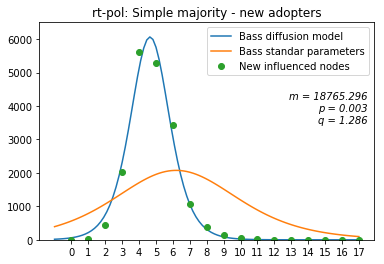

In [138]:
x_sm = np.linspace(-1, 17, 100)
y_sm = bass_wo(x_sm, *popt)
y_standar = bass_wo(x_sm, m_sm, 0.03, 0.38)

plt.title('rt-pol: Simple majority - new adopters')
var_text = 'm = {}\np = {}\nq = {}'.format(m_sm,p_sm,q_sm)
plt.text(17.5, 3500, var_text, horizontalalignment='right', style='italic')

pylab.plot(x_sm, y_sm, label='Bass diffusion model')
pylab.plot(x_sm, y_standar, label='Bass standar parameters')
pylab.plot(xdata_sm, inverse_cum_sm, 'o', label='New influenced nodes')

pylab.ylim(0,6500)
pylab.xticks(range(0, 18))
pylab.legend(loc='best')
pylab.show()

## Max

In [10]:
df_plot = transform_data_plot(df_max).round(3)
df_plot.head()

,s,number_influenced
0,0,1.152
1,1,11.181
2,2,381.476
3,3,2292.954
4,4,7796.951


In [11]:
xdata_mx = df_plot['s'].values
ydata_mx = df_plot['number_influenced'].values

In [12]:
inverse_cum_mx = df_plot['number_influenced'].values.copy()
inverse_cum_mx[1:] -= inverse_cum_mx[:-1].copy()
inverse_cum_mx

array([   1.152,   10.029,  370.295, 1911.478, 5503.997, 5482.379,
       3515.966, 1091.183,  390.247,  135.618,   42.254,   11.771,
          2.134,    0.253,    0.283,    0.751,    0.133,    0.077])

In [139]:
popt, pcov = curve_fit(bass_wo, xdata_mx, inverse_cum_mx)

m_mx = popt[0].round(3)
p_mx = popt[1].round(3)
q_mx = popt[2].round(3)

print(popt)

[18789.85094759     0.00284807     1.3027172 ]


/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.


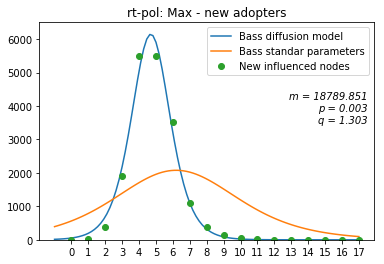

In [140]:
x_mx = np.linspace(-1, 17, 100)
y_mx = bass_wo(x_mx, *popt)
y_standar = bass_wo(x_mx, m_mx, 0.03, 0.38)

plt.title('rt-pol: Max - new adopters')
var_text = 'm = {}\np = {}\nq = {}'.format(m_mx,p_mx,q_mx)
plt.text(17.5, 3500, var_text, horizontalalignment='right', style='italic')

pylab.plot(x_mx, y_mx, label='Bass diffusion model')
pylab.plot(x_mx, y_standar, label='Bass standar parameters')
pylab.plot(xdata_mx, inverse_cum_mx, 'o', label='New influenced nodes')

pylab.ylim(0,6500)
pylab.xticks(range(0, 18))
pylab.legend(loc='best')
pylab.show()

## Min

In [15]:
df_plot = transform_data_plot(df_min).round(3)
df_plot.head()

,s,number_influenced
0,0,1452.124
1,1,2243.258
2,2,4084.759
3,3,5260.155
4,4,9473.139


In [16]:
xdata_mn = df_plot['s'].values
ydata_mn = df_plot['number_influenced'].values

In [17]:
inverse_cum_mn = df_plot['number_influenced'].values.copy()
inverse_cum_mn[1:] -= inverse_cum_mn[:-1].copy()
inverse_cum_mn

array([1452.124,  791.134, 1841.501, 1175.396, 4212.984, 4360.784,
       3137.819,  971.079,  352.171,  122.118,   38.603,   10.882,
          1.983,    0.234,    0.242,    0.736,    0.133,    0.077])

In [141]:
popt, pcov = curve_fit(bass_wo, xdata_mn, inverse_cum_mn)

m_mn = popt[0].round(3)
p_mn = popt[1].round(3)
q_mn = popt[2].round(3)

print(popt)

[37.19331154 39.04261134 22.64512111]


/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


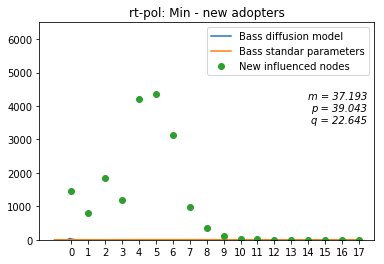

In [142]:
x_mn = np.linspace(-1, 17, 100)
y_mn = bass_wo(x_mn, *popt)
y_standar = bass_wo(x_mn, m_mn, 0.03, 0.38)

plt.title('rt-pol: Min - new adopters')
var_text = 'm = {}\np = {}\nq = {}'.format(m_mn,p_mn,q_mn)
plt.text(17.5, 3500, var_text, horizontalalignment='right', style='italic')

pylab.plot(x_mn, y_mn, label='Bass diffusion model')
pylab.plot(x_mn, y_standar, label='Bass standar parameters')
pylab.plot(xdata_mn, inverse_cum_mn, 'o', label='New influenced nodes')

pylab.ylim(0,6500)
pylab.xticks(range(0, 18))
pylab.legend(loc='best')
pylab.show()

## Random

In [20]:
df_plot = transform_data_plot(df_random).round(3)
df_plot.head()

,s,number_influenced
0,0,182.057
1,1,792.560
2,2,2311.551
3,3,3901.335
4,4,8563.746


In [21]:
xdata_r = df_plot['s'].values
ydata_r = df_plot['number_influenced'].values

In [22]:
inverse_cum_r = df_plot['number_influenced'].values.copy()
inverse_cum_r[1:] -= inverse_cum_r[:-1].copy()
inverse_cum_r

array([ 182.057,  610.503, 1518.991, 1589.784, 4662.411, 4840.077,
       3405.067, 1084.702,  385.457,  133.643,   41.676,   11.671,
          2.343,    0.29 ,    0.201,    0.87 ,    0.103,    0.154])

In [143]:
popt, pcov = curve_fit(bass_wo, xdata_r, inverse_cum_r)

m_r = popt[0].round(3)
p_r = popt[1].round(3)
q_r = popt[2].round(3)

print(popt)

[18046.7763558      0.00535312     1.1285022 ]


/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/w/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.


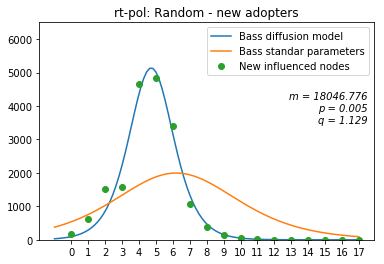

In [144]:
x_r = np.linspace(-1, 17, 100)
y_r = bass_wo(x_r, *popt)
y_standar = bass_wo(x_r, m_r, 0.03, 0.38)

plt.title('rt-pol: Random - new adopters')
var_text = 'm = {}\np = {}\nq = {}'.format(m_r,p_r,q_r)
plt.text(17.5, 3500, var_text, horizontalalignment='right', style='italic')

pylab.plot(x_r, y_r, label='Bass diffusion model')
pylab.plot(x_r, y_standar, label='Bass standar parameters')
pylab.plot(xdata_r, inverse_cum_r, 'o', label='New influenced nodes')

pylab.ylim(0,6500)
pylab.xticks(range(0, 18))
pylab.legend(loc='best')
pylab.show()

# Merge plots

/home/w/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


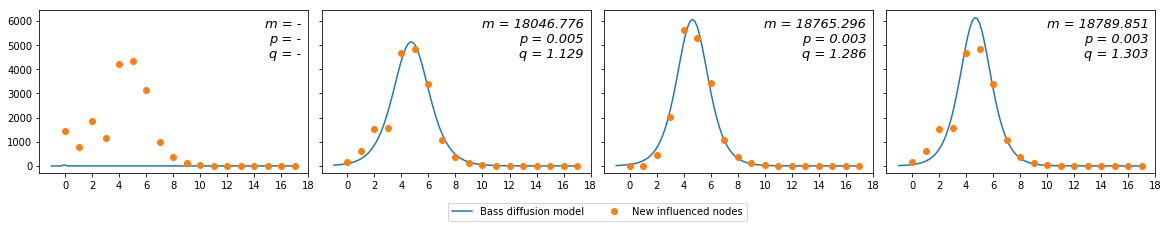

In [153]:
import numpy as np
import matplotlib.pyplot as plt


# min, random, majority, max

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig = plt.figure(figsize=(20, 3))

ax1 = plt.subplot(1, 4, 1, axisbg='white')
plt.plot(x_mn, y_mn, label='Bass diffusion model')
plt.plot(xdata_mn, inverse_cum_mn, 'o', label='New influenced nodes')
plt.xticks(np.linspace(0, 20, 10, endpoint=False))
plt.subplots_adjust(wspace = .05)
var_text = 'm = {}\np = {}\nq = {}'.format('-','-','-')
plt.text(17.5, 4500, var_text, horizontalalignment='right', style='italic', fontsize=13)

ax2 = plt.subplot(1, 4, 2, sharey=ax1, axisbg='white')
plt.plot(x_r, y_r) 
plt.plot(xdata_r, inverse_cum_r, 'o')
plt.xticks(np.linspace(0, 20, 10, endpoint=False))
plt.setp(ax2.get_yticklabels(), visible=False)
var_text = 'm = {}\np = {}\nq = {}'.format(m_r,p_r,q_r)
plt.text(17.5, 4500, var_text, horizontalalignment='right', style='italic', fontsize=13)

ax3 = plt.subplot(1, 4, 3, sharey=ax1, axisbg='white')
plt.plot(x_sm, y_sm )
plt.plot(xdata_sm, inverse_cum_sm, 'o')
plt.xticks(np.linspace(0, 20, 10, endpoint=False))
plt.setp(ax3.get_yticklabels(), visible=False)
var_text = 'm = {}\np = {}\nq = {}'.format(m_sm,p_sm,q_sm)
plt.text(17.5, 4500, var_text, horizontalalignment='right', style='italic', fontsize=13)


ax4 = plt.subplot(1, 4, 4, sharey=ax1, axisbg='white')
plt.plot(x_mx, y_mx )
plt.plot(xdata_r, inverse_cum_r, 'o')
plt.xticks(np.linspace(0, 20, 10, endpoint=False))
plt.setp(ax4.get_yticklabels(), visible=False)
var_text = 'm = {}\np = {}\nq = {}'.format(m_mx,p_mx,q_mx)
plt.text(17.5, 4500, var_text, horizontalalignment='right', style='italic', fontsize=13)


ax1.legend(bbox_to_anchor=(2.65, -0.15), ncol=2)

plt.show()